In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#Wordcloud
from wordcloud import WordCloud

In [ ]:
# Membaca data
df = pd.read_csv("youtube_comment-100.csv")
df

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2025-10-30T05:20:40Z,@rujalijali3653,Mundur,0
1,2025-10-28T04:51:47Z,@susilohadiwonosobo9156,"Anies, Ferry 🤮🤮🤮💩💩💩💩🤬🤬🤬🐷🐷💔💔👺👺👺🇵🇱🇵🇱🇵🇱🇵🇱 2029 👎👎...",0
2,2025-10-27T17:40:52Z,@JohanSitorus-z2h,"Suarakan bang, Erick Thohir telah melakukan ...",0
3,2025-10-27T02:32:59Z,@mangasimarpaung978,Pemerintah menindas Olahraga Indonesia. <br>Ma...,1
4,2025-10-25T17:22:20Z,@PresidentOfGamers,"Sudah hampir setahun, saya masih patah hati ST...",0
...,...,...,...,...
95,2025-10-14T15:11:42Z,@O-Project,Federasi BANGSAT krn isinya orang2 BANGSAT. <b...,0
96,2025-10-14T14:44:14Z,@rubenzeconis5808,Coach kluivert kurang experience di sepakbola...,0
97,2025-10-14T14:43:57Z,@ferwintazen6144,Erick Tohir harus mundur secara ksatria dia yg...,0
98,2025-10-14T14:33:46Z,@Fikry25,Petrik mundur erik mundur ganti ama nurdin hal...,0


In [ ]:
#Baca Kamus Lexicon
pos_words = pd.read_csv("positive_words_id.txt", header=None, names=['word'])
neg_words = pd.read_csv("negative_words_id.txt", header=None, names=['word'])


# ubah jadi set (lebih cepat untuk pencarian)
positive_lexicon = set(pos_words['word'].astype(str).str.lower().str.strip())
negative_lexicon = set(neg_words['word'].astype(str).str.lower().str.strip())


In [ ]:
# Cleaning Text (Regex)
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text)  # hapus HTML tag
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # hapus karakter non huruf
    text = re.sub(r'([a-zA-Z])\1\1','\\1',text) # Hapus duplikasi tiga karakter beruntun
    text = re.sub(r' +',' ',text) # Hapus spasi ganda
    text = re.sub(r'^[ ]|[ ]$','',text) # Hapus spasi di awal dan akhir kalimat
    text = text.lower()  # ubah ke huruf kecil
    return text

#texts = texts.apply(clean_text)

In [ ]:
# --- HITUNG SKOR SENTIMEN BERDASARKAN LEXICON ---
def get_sentiment_score(text):
    words = text.split()
    pos_count = sum(1 for w in words if w in positive_lexicon)
    neg_count = sum(1 for w in words if w in negative_lexicon)
    score = pos_count - neg_count
    return score

# --- TENTUKAN LABEL SENTIMEN ---
def label_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

In [ ]:
#Cleansing Data Awal
df['textDisplay'].astype(str)
df['clean_text'] = df['textDisplay'].apply(clean_text)
df

,publishedAt,authorDisplayName,textDisplay,likeCount,clean_text
0,2025-10-30T05:20:40Z,@rujalijali3653,Mundur,0,mundur
1,2025-10-28T04:51:47Z,@susilohadiwonosobo9156,"Anies, Ferry 🤮🤮🤮💩💩💩💩🤬🤬🤬🐷🐷💔💔👺👺👺🇵🇱🇵🇱🇵🇱🇵🇱 2029 👎👎...",0,anies ferry
2,2025-10-27T17:40:52Z,@JohanSitorus-z2h,"Suarakan bang, Erick Thohir telah melakukan ...",0,suarakan bang erick thohir telah melakukan kej...
3,2025-10-27T02:32:59Z,@mangasimarpaung978,Pemerintah menindas Olahraga Indonesia. <br>Ma...,1,pemerintah menindas olahraga indonesia masyara...
4,2025-10-25T17:22:20Z,@PresidentOfGamers,"Sudah hampir setahun, saya masih patah hati ST...",0,sudah hampir setahun saya masih patah hati sty...
...,...,...,...,...,...
95,2025-10-14T15:11:42Z,@O-Project,Federasi BANGSAT krn isinya orang2 BANGSAT. <b...,0,federasi bangsat krn isinya orang bangsat pk p...
96,2025-10-14T14:44:14Z,@rubenzeconis5808,Coach kluivert kurang experience di sepakbola...,0,coach kluivert kurang experience di sepakbola ...
97,2025-10-14T14:43:57Z,@ferwintazen6144,Erick Tohir harus mundur secara ksatria dia yg...,0,erick tohir harus mundur secara ksatria dia yg...
98,2025-10-14T14:33:46Z,@Fikry25,Petrik mundur erik mundur ganti ama nurdin hal...,0,petrik mundur erik mundur ganti ama nurdin hal...


In [ ]:
#Proses Sentiment Analisis Menggunakan Kamus Lexicon
df['sentiment_score'] = df['clean_text'].apply(get_sentiment_score)
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)
df

,publishedAt,authorDisplayName,textDisplay,likeCount,clean_text,sentiment_score,sentiment_label
0,2025-10-30T05:20:40Z,@rujalijali3653,Mundur,0,mundur,-1,negative
1,2025-10-28T04:51:47Z,@susilohadiwonosobo9156,"Anies, Ferry 🤮🤮🤮💩💩💩💩🤬🤬🤬🐷🐷💔💔👺👺👺🇵🇱🇵🇱🇵🇱🇵🇱 2029 👎👎...",0,anies ferry,0,neutral
2,2025-10-27T17:40:52Z,@JohanSitorus-z2h,"Suarakan bang, Erick Thohir telah melakukan ...",0,suarakan bang erick thohir telah melakukan kej...,-1,negative
3,2025-10-27T02:32:59Z,@mangasimarpaung978,Pemerintah menindas Olahraga Indonesia. <br>Ma...,1,pemerintah menindas olahraga indonesia masyara...,-2,negative
4,2025-10-25T17:22:20Z,@PresidentOfGamers,"Sudah hampir setahun, saya masih patah hati ST...",0,sudah hampir setahun saya masih patah hati sty...,-3,negative
...,...,...,...,...,...,...,...
95,2025-10-14T15:11:42Z,@O-Project,Federasi BANGSAT krn isinya orang2 BANGSAT. <b...,0,federasi bangsat krn isinya orang bangsat pk p...,1,positive
96,2025-10-14T14:44:14Z,@rubenzeconis5808,Coach kluivert kurang experience di sepakbola...,0,coach kluivert kurang experience di sepakbola ...,-1,negative
97,2025-10-14T14:43:57Z,@ferwintazen6144,Erick Tohir harus mundur secara ksatria dia yg...,0,erick tohir harus mundur secara ksatria dia yg...,-1,negative
98,2025-10-14T14:33:46Z,@Fikry25,Petrik mundur erik mundur ganti ama nurdin hal...,0,petrik mundur erik mundur ganti ama nurdin hal...,-3,negative


In [ ]:
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts

,count
sentiment_label,
negative,44
neutral,30
positive,26


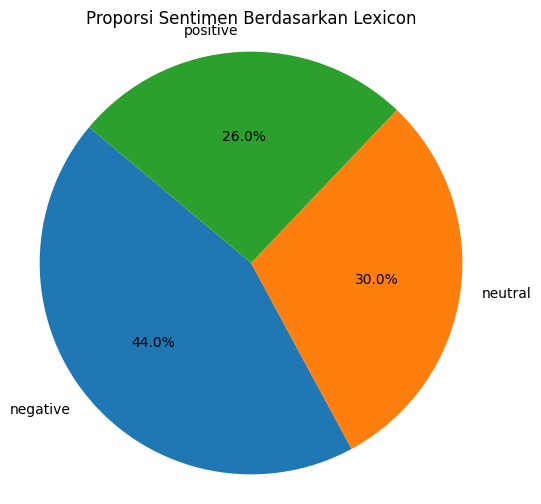

In [ ]:
#Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Proporsi Sentimen Berdasarkan Lexicon')
plt.axis('equal')
plt.show()

In [ ]:
# Fungsi bantu untuk membuat wordcloud dari subset data
def generate_wordcloud(text_series, title):
    text = " ".join(text_series)
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

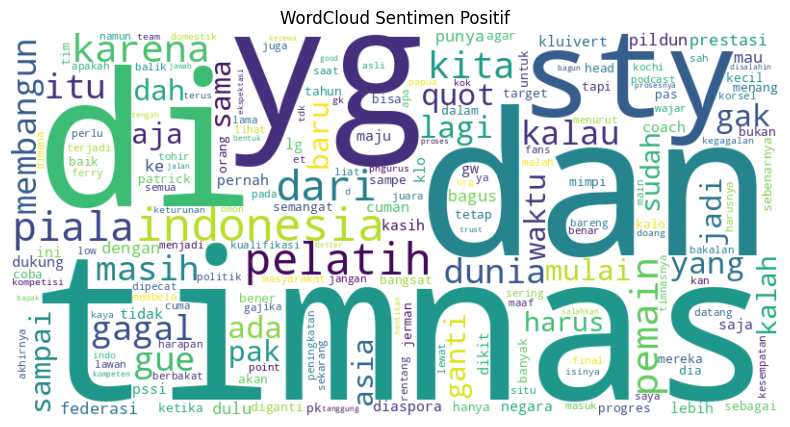

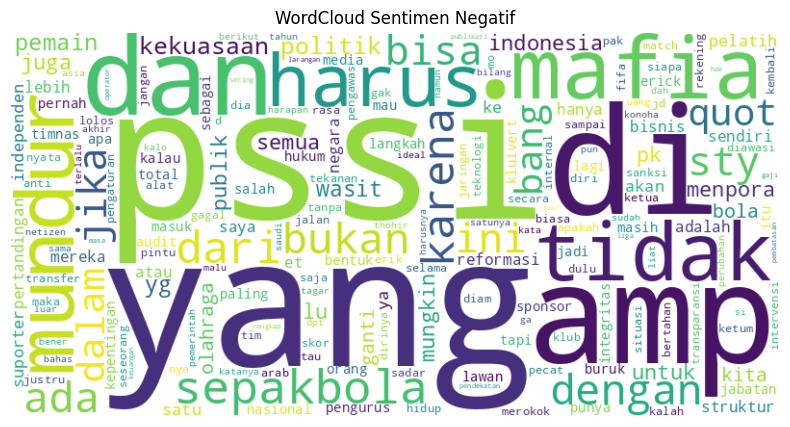

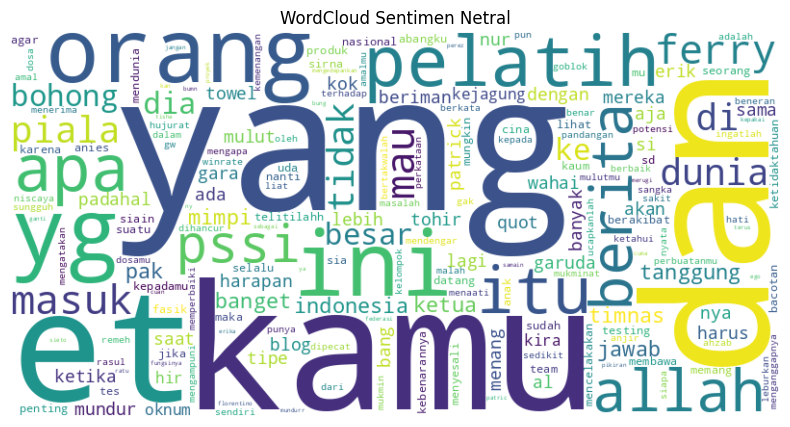

In [ ]:
# Wordcloud untuk sentimen positif
positive_text = df[df['sentiment_label'] == 'positive']['clean_text']
generate_wordcloud(positive_text, "WordCloud Sentimen Positif")

# Wordcloud untuk sentimen negatif
negative_text = df[df['sentiment_label'] == 'negative']['clean_text']
generate_wordcloud(negative_text, "WordCloud Sentimen Negatif")

# Wordcloud untuk sentimen netral
neutral_text = df[df['sentiment_label'] == 'neutral']['clean_text']
generate_wordcloud(neutral_text, "WordCloud Sentimen Netral")

In [ ]:
#Import Dataframe yang sudah dilabeli
df.to_csv("youtube_comment-100_labeled.csv", index=False)